**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático**

*Edición 2022*

**Entregable 3 - Parte 2**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

----

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [163]:
# Cargamos la base en pandas 
import io
dataset= pd.read_csv('https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv', encoding='utf-8', comment="#")
#dataset= pd.read_csv(io.BytesIO(uploaded['loan_data.csv']), encoding='utf-8', comment="#")

In [164]:
dataset[:10]

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
5,0,11500,53651.0,87547.0,18.0,0.0,0.0,191.396887,0.0,16.0,34.368651
6,0,17200,103519.0,118074.0,0.0,0.0,0.0,102.678612,1.0,21.0,41.418353
7,0,24200,22763.0,47622.0,23.0,0.0,0.0,126.922691,1.0,10.0,23.040945
8,0,12600,62493.0,77141.0,13.0,0.0,0.0,266.333101,0.0,26.0,27.007872
9,0,12300,90006.0,121122.0,9.0,0.0,0.0,133.497541,1.0,21.0,36.910482


In [165]:
len(dataset)

1854

In [166]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [167]:
X_train.shape

(1483, 10)

In [168]:
y_train.shape

(1483,)

In [169]:
# Cantidad de clasificados como 1 en y_train
y_train.sum()

251

In [170]:
y_test.shape

(371,)

In [171]:
# Cantidad de clasificados como 1 en y_test
y_test.sum()

58


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?



**Respuestas Ejercicio 1:**

1. El conjunto de datos trata sobre préstamos realizados por una entidad bancaria con garantía hipotecaria. Esta conformado por 1854 datos de clientes para 10 atributos y la variable target. 

2. La variable objetivo a predecir es **TARGET**, es una variable binaria que indica si un solicitante finalmente incumplió o fue gravemente moroso (1 = el cliente incumplió con el préstamo, 0 = préstamo reembolsado). 

3. Los atributos disponibles para hacer la predicción son:

* **LOAN:** Importe de la solicitud de préstamo.
* **MORTDUE:** Monto adeudado sobre la hipoteca existente.
* **VALUE:** Valor de la propiedad actual.
* **YOJ:** Años en el trabajo actual.
* **DEROG:** Número de informes derogados importantes.
* **DELINQ:** Número de líneas de crédito morosas.
* **CLAGE:** Antigüedad de la línea comercial más antigua en meses.
* **NINQ:** Número de líneas de crédito recientes.
* **CLNO:** Número de líneas de crédito.
* **DEBTINC:** Relación deuda-ingresos.

4. Imaginamos que los atributos más determinantes para las predicciones son:

* **LOAN**
* **MORTDUE**
* **VALUE**
* **YOJ**
* **DEROG**
* **DELINQ**
* **DEBTINC**

 Sin embargo, consideramos que todos los atributos son útiles para realizar las predicciones, por lo tanto los usaremos a todos.




## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

**Respuestas Ejercicio 2.1:**

Normalizamos la base:

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
# Normalizamos X_train
scaled_features_train = StandardScaler().fit_transform(X_train.values)
X_train_escalado = pd.DataFrame(scaled_features_train, index=X_train.index, columns=X_train.columns)
# Normalizamos X_test
scaled_features_test = StandardScaler().fit_transform(X_test.values)
X_test_escalado = pd.DataFrame(scaled_features_test, index=X_test.index, columns=X_test.columns)

In [174]:
# Importamos el SGDClassifier
from sklearn.linear_model import SGDClassifier

In [175]:
# Definimos el modelo usando los valores por omisión de scikit-learn para todos los parámetros y fijamos la semilla
model = SGDClassifier(random_state=1)

In [176]:
# Entrenamos el modelo
model.fit(X_train_escalado, y_train)

SGDClassifier(random_state=1)

In [177]:
# Evaluamos el modelo
y_pred_train = model.predict(X_train_escalado) # Predichos para el conjunto de entrenamiento
y_pred_test = model.predict(X_test_escalado) # Predichos para el conjunto de evaluación

In [178]:
y_pred_train.shape

(1483,)

In [179]:
# Cantidad de clasificados como 1 en y_pred_train
y_pred_train.sum()

147

In [180]:
y_pred_test.shape

(371,)

In [181]:
# Cantidad de clasificados como 1 en y_pred_test
y_pred_test.sum()

30

### Accuracy

In [182]:
# Calculamos el accuracy para el conjunto de entrenamiento (train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.8664868509777478

In [183]:
# Calculamos el accuracy para el conjunto de evaluación (test)
accuracy_score(y_test, y_pred_test)

0.8706199460916442

La accuracy en el conjunto de entrenamiento es 0.87 y en el conjunto de evaluación es 0.87.

### Precision

Introducimos la siguiente notación:

VP = Cantidad de verdaderos positivos (verdaderos unos)

VN = Cantidad de verdaderos negativos (verdaderos ceros)

FP = Cantidad de falsos positivos (falsos unos)

FN = Cantidad de falsos negativos (falsos ceros)

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$P=\frac{VP}{VP+FP}.$$

In [184]:
# Precision para el conjunto de entrenamiento (train)
from sklearn.metrics import precision_score
precision_score(y_train, y_pred_train)

0.6802721088435374

Para el conjunto de entrenamiento, la proporción de unos propuestos por el modelo que fueron correctos es de 0.68 (68%). 

In [185]:
# Precision para el conjunto de evaluación (test)
precision_score(y_test, y_pred_test)

0.6666666666666666

Para el conjunto de evaluación, la proporción de unos propuestos por el modelo que fueron correctos es de 0.67 (67%).

### Recall

La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$ R=\frac{VP}{FN+VP}.$$

In [186]:
# Recall para el conjunto de entrenamiento (train)
from sklearn.metrics import recall_score
recall_score(y_train, y_pred_train)

0.398406374501992

Para el conjunto de entrenamiento, la proporción de unos correctos que fueron encontrados por el modelo es de 0.40 (40%).

In [187]:
# Recall para el conjunto de evaluación (test)
recall_score(y_test, y_pred_test)

0.3448275862068966

Para el conjunto de evaluación, la proporción de unos correctos que fueron encontrados por el modelo es de 0.34 (34%).

### F1

$F_1$ se define como:

$$F_1 = \frac{2 * P * R}{P + R},$$

donde $P$ es precisión y $R$ es recall.





In [188]:
# F1 para el conjunto de entrenamiento (train)
from sklearn.metrics import f1_score
f1_score(y_train, y_pred_train)

0.5025125628140703

In [189]:
# F1 para el conjunto de evaluación (test)
f1_score(y_test, y_pred_test)

0.4545454545454545

In [190]:
# Métricas resumen para conjunto de entrenamiento (train)
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1232
           1       0.68      0.40      0.50       251

    accuracy                           0.87      1483
   macro avg       0.78      0.68      0.71      1483
weighted avg       0.85      0.87      0.85      1483



In [191]:
# Métricas resumen para conjunto de evalución (test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       313
           1       0.67      0.34      0.45        58

    accuracy                           0.87       371
   macro avg       0.78      0.66      0.69       371
weighted avg       0.85      0.87      0.85       371



### Matriz de confusión

La matriz de confusión se define como:

\begin{bmatrix}
VN & FP \\
FN & VP
\end{bmatrix}

Esto es, la entrada superior izquierda de la matriz corresponde a los verdaderos ceros (VN), la entrada superior derecha corresponde a los falsos unos (FP), la entrada inferior izquierda son los falsos ceros (FN) y la entrada inferior derecha los verdederos unos (VP). Como resultado positivo consideramos al 1 y como negativo al 0. 

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
# Matriz de confusión para el conjunto de entrenamiento (train)
confusion_matrix(y_train, y_pred_train)

array([[1185,   47],
       [ 151,  100]])

In [194]:
# Matriz de confusión para el conjunto de evalución (test)
confusion_matrix(y_test, y_pred_test)

array([[303,  10],
       [ 38,  20]])

Para las matrices de confusión se busca maximizar la diagonal principal y minimizar el resto de las entradas. 

**Conclusión: en el presente modelo no se han obtenido métricas y matrices de confusión del todo satisfactorias (la presición para el conjunto de evaluación fue de 0.67) ya que no hubo ajuste de hiperparámetros.**

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**Respuestas Ejercicio 2.2:**

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
model = SGDClassifier(random_state=1, eta0=0.001) # Elegimos un eta mayor que cero, ya el parámetro learning_rate constante lo requiere, y el default es cero.

In [196]:
# Elegimos diferentes funciones loss, tasas de entrenamiento, penalty y tasas de regularización
param_grid = {
    'loss': ['hinge', 'log'],
    'learning_rate': ['constant','optimal'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [0.000001, 0.0001, 0.001, 0.01, 1, 10, 100.0],
}

In [197]:
# Entrenamos los modelos con diferentes parámetros
cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train_escalado, y_train);

In [198]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [199]:
# Evaluamos los resultados para diferentes combinaciones de parámetros
df = pd.DataFrame(results)
df[['param_loss', 'param_learning_rate','param_penalty','param_alpha','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'], ascending=True)

,param_loss,param_learning_rate,param_penalty,param_alpha,mean_test_score,std_test_score,rank_test_score
47,log,optimal,elasticnet,0.01,0.869863,0.008085,1
45,log,optimal,l2,0.01,0.869863,0.008627,1
34,log,optimal,l1,0.001,0.869856,0.015363,3
33,log,optimal,l2,0.001,0.869185,0.013047,4
35,log,optimal,elasticnet,0.001,0.869181,0.014425,5
...,...,...,...,...,...,...,...
9,log,optimal,l2,0.000001,0.815197,0.033253,80
11,log,optimal,elasticnet,0.000001,0.813868,0.039432,81
8,hinge,optimal,elasticnet,0.000001,0.803133,0.057858,82
6,hinge,optimal,l2,0.000001,0.799732,0.040765,83


In [200]:
# Elegimos el mejor modelo
best_model = cv.best_estimator_

In [201]:
# Parámetros del mejor modelo
cv.best_params_

{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}

In [202]:
# Evaluamos el mejor modelo
y_pred_train_best = best_model.predict(X_train_escalado) # Predichos para el conjunto de entrenamiento
y_pred_test_best = best_model.predict(X_test_escalado) # Predichos para el conjunto de evaluación

In [203]:
# Calculamos el accuracy para el conjunto de entrenamiento (train)
accuracy_score(y_train, y_pred_train_best)

0.8718813216453135

In [204]:
# Métricas resumen para conjunto de entrenamiento (train)
print(classification_report(y_train, y_pred_train_best))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.81      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.69      1483
weighted avg       0.87      0.87      0.85      1483



In [205]:
# Matriz de confusión para el conjunto de entrenamiento (train)
confusion_matrix(y_train, y_pred_train_best)

array([[1214,   18],
       [ 172,   79]])

In [206]:
# Calculamos el accuracy para el conjunto de evaluación (test)
accuracy_score(y_test, y_pred_test_best)

0.8787061994609164

In [207]:
# Métricas resumen para conjunto de evalución (test)
print(classification_report(y_test, y_pred_test_best))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.78      0.31      0.44        58

    accuracy                           0.88       371
   macro avg       0.83      0.65      0.69       371
weighted avg       0.87      0.88      0.86       371



In [208]:
# Matriz de confusión para el conjunto de evaluación (test)
confusion_matrix(y_test, y_pred_test_best)

array([[308,   5],
       [ 40,  18]])

**Conclusión: al realizar el ajuste de hiperparámetros se logró un mejor modelo, lo cual se refleja en los valores de las métricas y de las matrices de confusión (mejoraron en relación al modelo propuesto en el ejercicio 1). Notar que la presición en el conjunto de evaluación mejoró de 0.67 a 0.78.**

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


**Respuestas Ejercicios 3.1:**

In [209]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [210]:
# Entrenamos el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [211]:
# Predecimos para luego evaluar
y_train_pred = clf.predict(X_train) # Predichos para el conjunto de entrenamiento (train)
y_test_pred = clf.predict(X_test) # Predichos para el conjunto de evalución (test)

In [212]:
# Cantidad de clasificados como 1 en y_tarin_pred
y_train_pred.sum()

251

In [213]:
# Cantidad de clasificados como 1 en y_test_pred
y_test_pred.sum()

60

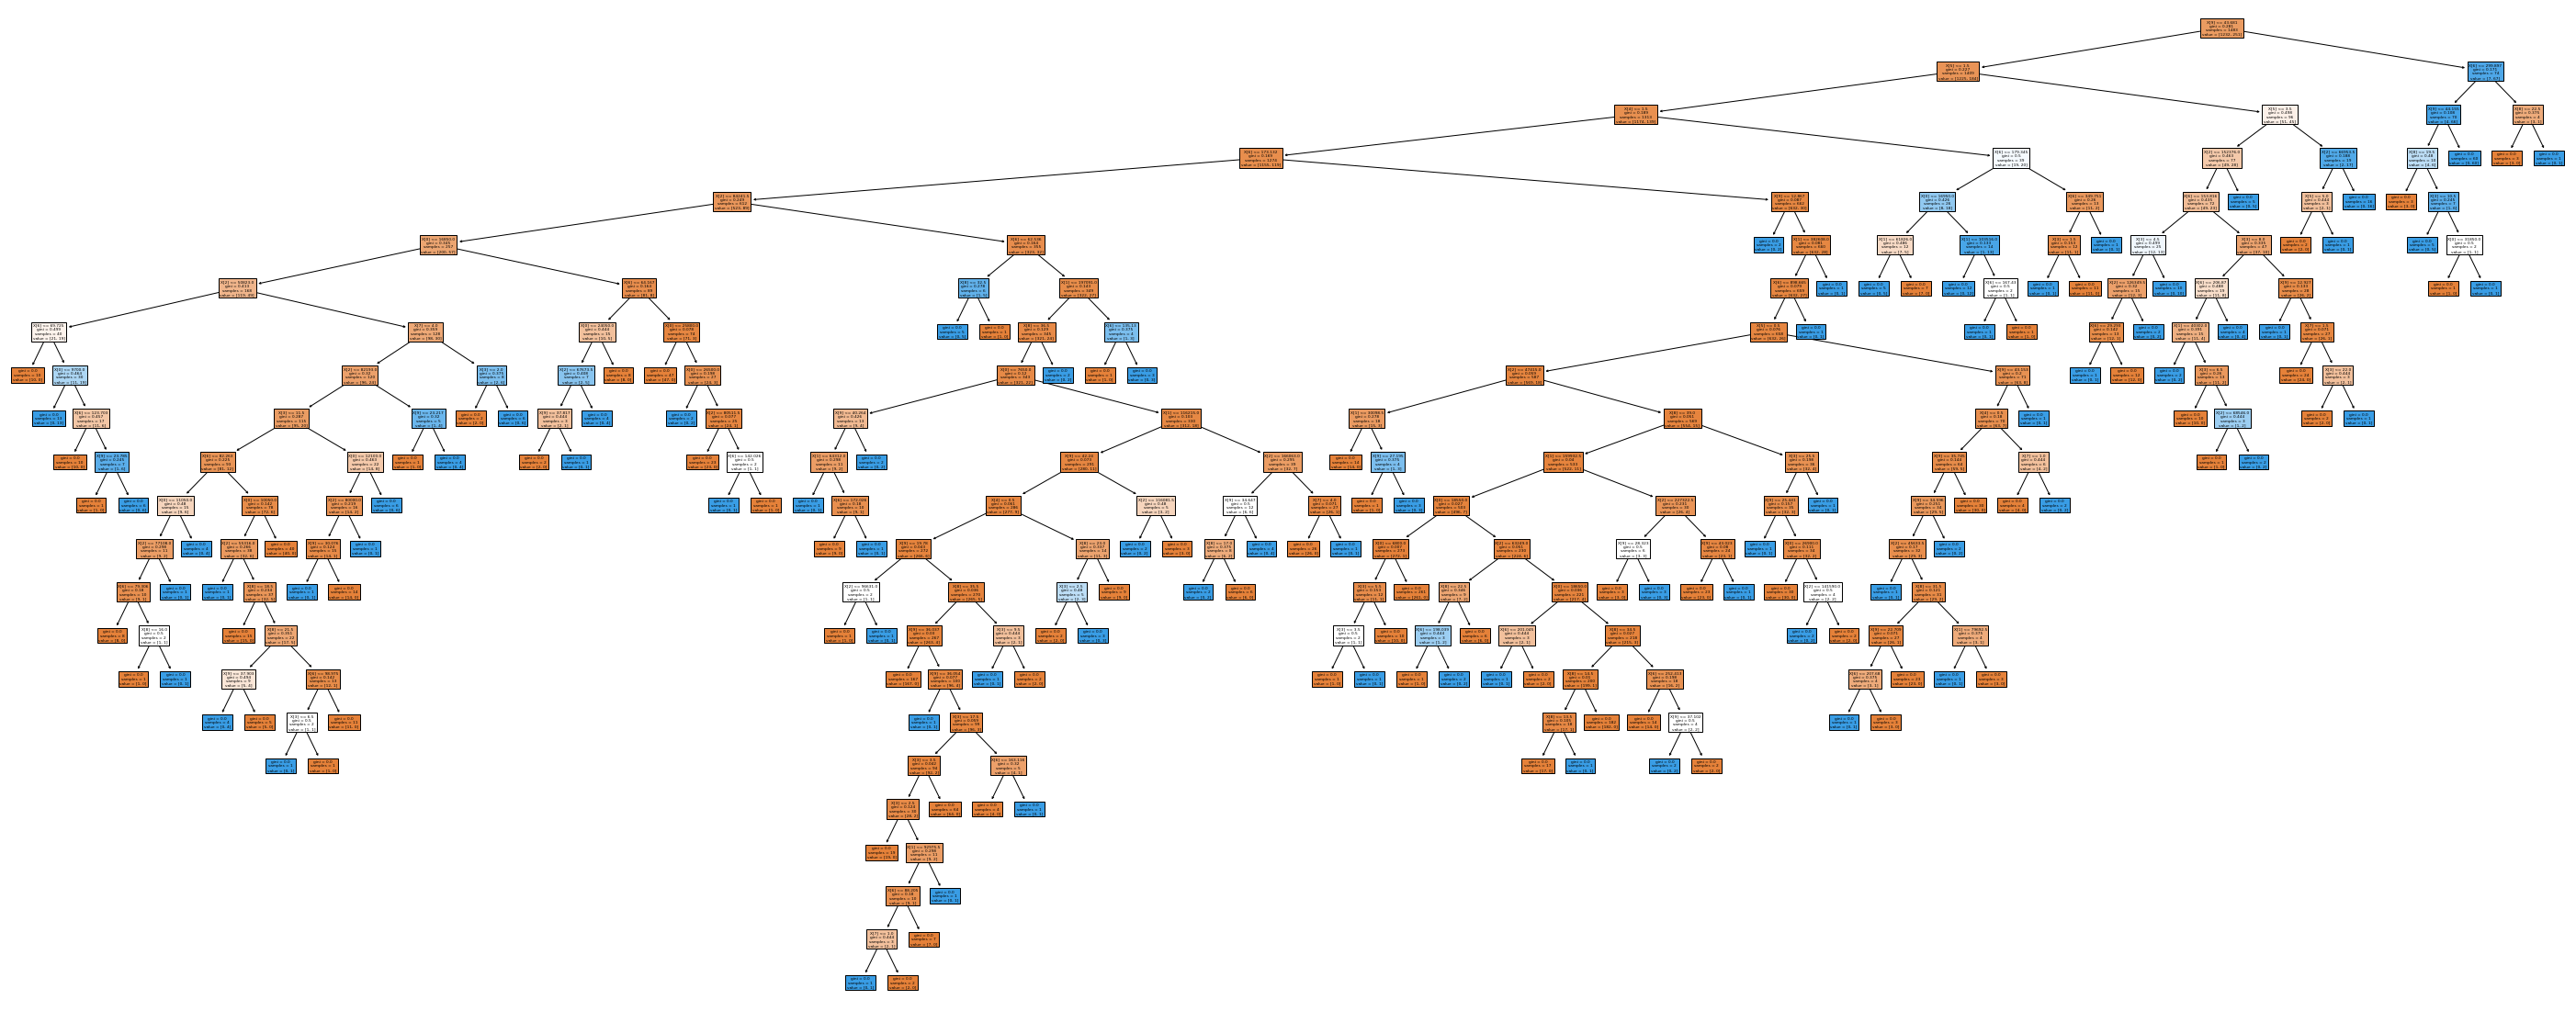

In [214]:
# Árbol del modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20)) 
plot_tree(clf,filled=True);

### Accuracy

In [215]:
# Calculamos el accuracy para el conjunto de entrenamiento (train)
accuracy_score(y_train, y_train_pred)

1.0

In [216]:
# Calculamos el accuracy para el conjunto de evalución (test)
accuracy_score(y_test, y_test_pred)

0.8814016172506739

### Precision, Recall y F1

In [217]:
# Métricas resumen para conjunto de entrenamiento (train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



In [218]:
# Métricas resumen para conjunto de evaluación (test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



### Matriz de confusión

In [219]:
# Matriz de confusión para el conjunto de entrenamiento (train)
confusion_matrix(y_train, y_train_pred)

array([[1232,    0],
       [   0,  251]])

Notar que el modelo clasifica perfectamente al conjunto de entrenamiento, podría estar ocurriendo sobreajuste.

In [220]:
# Matriz de confusión para el conjunto de evalución (test)
confusion_matrix(y_test, y_test_pred)

array([[290,  23],
       [ 21,  37]])

**Conclusión: el modelo propuesto en este ejercicio no tiene límite de profundidad, con lo cual clasifica perfectamente al conjunto de entrenamiento, esto provoca sobreajuste y alta complejidad del árbol.**

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**Respuestas Ejercicio 3.2:**

In [221]:
# Seleccionamos diferentes valores para los parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4],
    'min_samples_leaf' : [1,2,3],
}

In [222]:
# Entrenamos los modelos para los diferentes parámetros
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [223]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [224]:
# Evaluamos los diferentes modelos para cada combinación de parámetros
import pandas as pd
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'], ascending=True)
#df

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
11,gini,4,3,0.879978,0.014675,1
9,gini,4,1,0.878633,0.014701,2
8,gini,3,3,0.877955,0.010041,3
7,gini,3,2,0.877955,0.010041,3
6,gini,3,1,0.877955,0.010041,3
10,gini,4,2,0.877282,0.015568,6
23,entropy,4,3,0.873910,0.013011,7
20,entropy,3,3,0.873239,0.013509,8
19,entropy,3,2,0.873239,0.013509,8
18,entropy,3,1,0.873239,0.013509,8


In [225]:
# Elegimos el mejor modelo
best_model = cv.best_estimator_

In [226]:
# Parámetros del mejor modelo
cv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

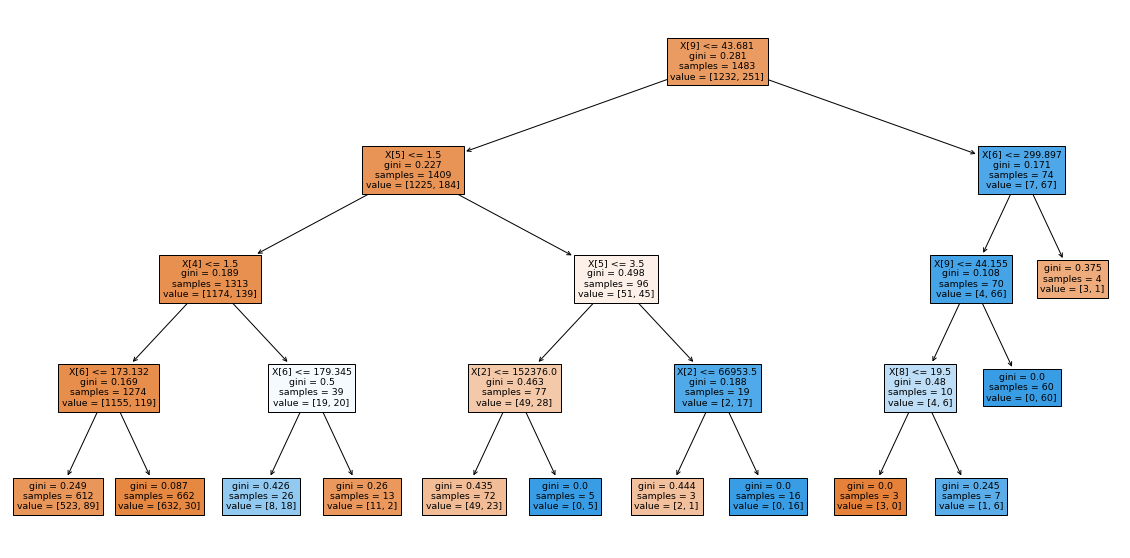

In [227]:
# Árbol del mejor modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10)) 
plot_tree(best_model,filled=True);

In [228]:
# Evaluamos el mejor modelo
y_train_pred_best = best_model.predict(X_train) # Predichos para el conjunto de entrenamiento
y_test_pred_best = best_model.predict(X_test) # Predichos para el conjunto de evaluación

### Accuracy

In [229]:
# Calculamos el accuracy para el conjunto de entrenamiento (train)
accuracy_score(y_train, y_train_pred_best)

0.8954821308159137

In [230]:
# Calculamos el accuracy para el conjunto de evalución (test)
accuracy_score(y_test, y_test_pred_best)

0.8814016172506739

### Precision, Recall y F1

In [231]:
# Métricas resumen para conjunto de entrenamiento (train)
print(classification_report(y_train, y_train_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1232
           1       0.92      0.42      0.58       251

    accuracy                           0.90      1483
   macro avg       0.91      0.71      0.76      1483
weighted avg       0.90      0.90      0.88      1483



In [232]:
# Métricas resumen para conjunto de evaluación (test)
print(classification_report(y_test, y_test_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       313
           1       0.73      0.38      0.50        58

    accuracy                           0.88       371
   macro avg       0.81      0.68      0.72       371
weighted avg       0.87      0.88      0.87       371



### Matriz de confusión

In [233]:
# Matriz de confusión para el conjunto de entrenamiento (train)
confusion_matrix(y_train, y_train_pred_best)

array([[1223,    9],
       [ 146,  105]])

In [234]:
# Matriz de confusión para el conjunto de evalución (test)
confusion_matrix(y_test, y_test_pred_best)

array([[305,   8],
       [ 36,  22]])

**Conclusión: el último modelo elegido tiene métricas muy similares al modelo del ejercicio anterior para el conjunto de evaluación, sin embargo es más sencillo. Por esta razón, consideramos que este último es un modelo más adecuado.**